## 感知器

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import perceptron
import plotDecisionRegions
from imp import reload

%load_ext autoreload
%autoreload 2

%config InlineBackend.figure_format='svg'

### 定义感知器
见[perceptron.py](perceptron.py)

加载鸢尾花数据集,并显示最后5条数据

In [2]:
df = pd.read_csv(
    'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


提取前100个类标, 有50个setosa和50个versicolor, 分别用-1(setaso)和1(versicolor)来替代, 把结果存入y, 

类似地提取这100个训练样本的第一列(sepal length萼片长度)和第三列(petal length花瓣长度)特征, 赋值给属性X.

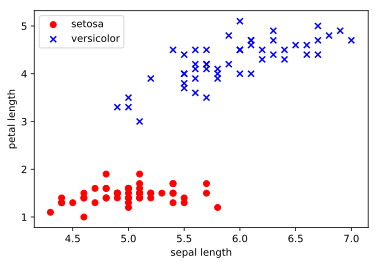

In [3]:
y = df.iloc[:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)
X = df.iloc[:100, [0, 2]].values
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X[50:, 0], X[50:, 1], color='blue', marker='x', label='versicolor')
plt.xlabel('sepal length')
plt.ylabel('petal length')
plt.legend(loc='upper left')

### 训练感知器

Text(0, 0.5, 'Number of misclassifications')

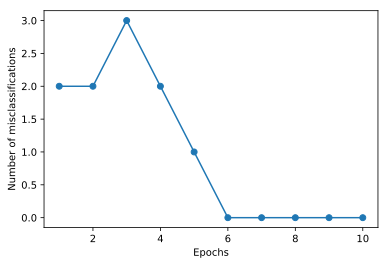

In [4]:
ppn = perceptron.Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')

### 定义了绘制决策区域方法
[plot_decision_regions](plotDecisionRegions.py)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


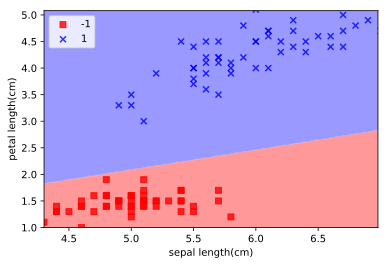

In [5]:
plotDecisionRegions.plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length(cm)')
plt.ylabel('petal length(cm)')
plt.legend(loc='upper left')

### 使用Adaline来训练

Text(0.5, 1.0, 'Adaline - Learning rate 0.0001')

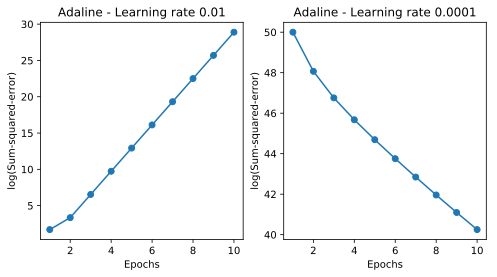

In [6]:
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(8,4))

ada1 = perceptron.AdalineGD(n_iter=10, eta=0.01).fit(X, y)
ax[0].plot(range(1, len(ada1.cost_)+1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')

ada2 = perceptron.AdalineGD(n_iter=10, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_)+1), ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('log(Sum-squared-error)')
ax[1].set_title('Adaline - Learning rate 0.0001')

### 标准化

In [7]:
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0]-X[:, 0].mean())/X[:, 0].std()
X_std[:, 1] = (X[:, 1]-X[:, 1].mean())/X[:, 1].std()

标准化再次对Adaline进行训练

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


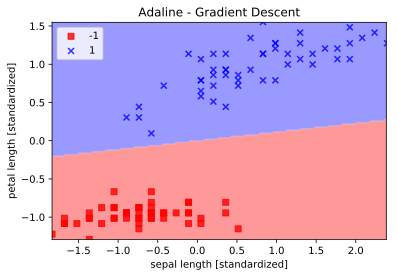

In [8]:
ada = perceptron.AdalineGD(n_iter=15, eta=0.01)
ada.fit(X_std, y)
plotDecisionRegions.plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')

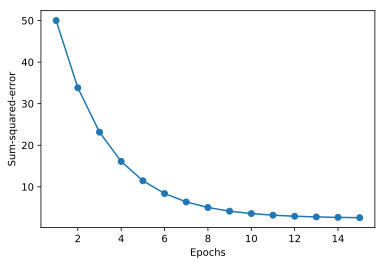

In [9]:
plt.plot(range(1, len(ada.cost_)+1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.show()

### 使用随机梯度下降

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


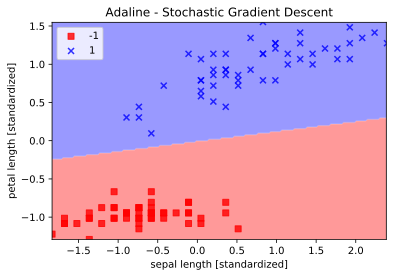

In [10]:
ada = perceptron.AdalineSGD(n_iter=15,eta=0.01,random_state=1)
ada.fit(X_std,y)
plotDecisionRegions.plot_decision_regions(X_std,y,classifier=ada)
plt.title('Adaline - Stochastic Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')

Text(0, 0.5, 'Average Cost')

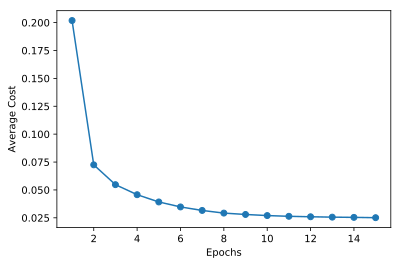

In [11]:
plt.plot(range(1, len(ada.cost_)+1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')